# Unupervised Learning with toybrains dataset using Scikit-learn

> Author(s): JiHoon Kim<br>
> Date: 07 June 2023<br>

## Installing Libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages

import matplotlib.pyplot as plt

In [3]:
# add custom imports
# (TODO) refactoring needed

from utils.dataset import generate_dataset
from utils.sklearn import get_reduc_loader, run_logistic_regression

## Generating the synthetic dataset

In [6]:
# ! python create_toybrains.py -d -n 10000

Generative parameter        |        States 
------------------------------------------------------------
brain_vol-radminor         [20 21 22 23 24]
brain_vol-radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain_int                  [210 200 190 180 170]
border_int                 ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg

## Loading the Dataset

Set dataset Config

In [4]:
# set random seed

seed = 42

# set raw csv path

raw_csv_path = '/ritter/share/projects/JiHoon/toybrains/toybrains/toybrains_n10000.csv'

# set target label

label = 'lblbin_shp' #, 'lblbin_shp-vol', 'lblbin_shp-vent'

Load dataset (same generator from lightning)

In [5]:
# split the dataset for training, validation, and test from raw dataset

dataset = generate_dataset(raw_csv_path, label, seed)

Set model config

In [6]:
# set dimensionality reduction method

method = 'PCA' # PCA, MDS, ICA # (TODO) ICA, tSNE, LDA

# set n_components

n_components = 100

Run dimensionality reduction

In [7]:
# conduct dimensionality reduction

data = get_reduc_loader(dataset = dataset, method = method, n_components=n_components, seed = seed)

Run logistic regression

In [8]:
# run logistic regression

run_logistic_regression(data)

Train Accuracy:   0.5407 Validation Accuracy:   0.4970 Test Accuracy:   0.5080


(0.54075, 0.497, 0.508)

Example

`Labels : 'lblbin_shp', 'lblbin_shp-vol', 'lblbin_shp-vent'`


#################### lblbin_shp in PCA ####################
N = 3
Train Accuracy:   0.5144 Validation Accuracy:   0.4800 Test Accuracy:   0.4770
N = 10
Train Accuracy:   0.5195 Validation Accuracy:   0.4970 Test Accuracy:   0.4990
N = 25
Train Accuracy:   0.5238 Validation Accuracy:   0.4890 Test Accuracy:   0.4820
N = 50
Train Accuracy:   0.5285 Validation Accuracy:   0.5050 Test Accuracy:   0.4660
N = 250
Train Accuracy:   0.5745 Validation Accuracy:   0.4860 Test Accuracy:   0.4890
N = 500
Train Accuracy:   0.6004 Validation Accuracy:   0.5010 Test Accuracy:   0.4890
N = 1000
Train Accuracy:   0.6439 Validation Accuracy:   0.4740 Test Accuracy:   0.4930


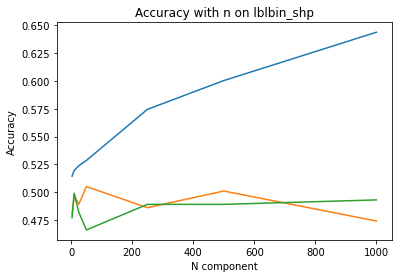


#################### lblbin_shp-vol in PCA ####################
N = 3
Train Accuracy:   0.5100 Validation Accuracy:   0.5230 Test Accuracy:   0.4920
N = 10
Train Accuracy:   0.5191 Validation Accuracy:   0.5230 Test Accuracy:   0.4890
N = 25
Train Accuracy:   0.5194 Validation Accuracy:   0.5260 Test Accuracy:   0.4870
N = 50
Train Accuracy:   0.5325 Validation Accuracy:   0.5100 Test Accuracy:   0.5120
N = 250
Train Accuracy:   0.5683 Validation Accuracy:   0.4830 Test Accuracy:   0.4920
N = 500
Train Accuracy:   0.6055 Validation Accuracy:   0.4970 Test Accuracy:   0.4890
N = 1000
Train Accuracy:   0.6475 Validation Accuracy:   0.5200 Test Accuracy:   0.4940


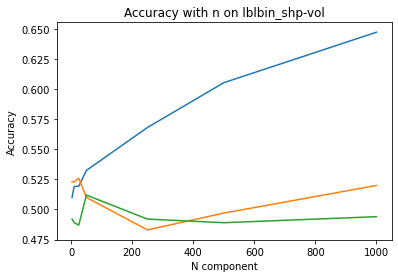


#################### lblbin_shp-vent in PCA ####################
N = 3
Train Accuracy:   0.5152 Validation Accuracy:   0.4960 Test Accuracy:   0.5280
N = 10
Train Accuracy:   0.5204 Validation Accuracy:   0.4830 Test Accuracy:   0.5230
N = 25
Train Accuracy:   0.5286 Validation Accuracy:   0.4870 Test Accuracy:   0.5190
N = 50
Train Accuracy:   0.5347 Validation Accuracy:   0.4940 Test Accuracy:   0.5140
N = 250
Train Accuracy:   0.5655 Validation Accuracy:   0.4880 Test Accuracy:   0.4930
N = 500
Train Accuracy:   0.5962 Validation Accuracy:   0.4960 Test Accuracy:   0.4760
N = 1000
Train Accuracy:   0.6484 Validation Accuracy:   0.4810 Test Accuracy:   0.4570


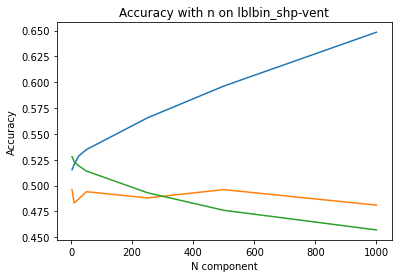

In [9]:
raw_csv_path = '/ritter/share/projects/JiHoon/toybrains/toybrains/toybrains_n10000.csv'
method = 'PCA'
labels = ['lblbin_shp', 'lblbin_shp-vol', 'lblbin_shp-vent']
n_component_list = [3, 10, 25, 50, 250, 500, 1000]
seed = 42

for label in labels:
    print(f"\n{'#'*20} {label} in {method} {'#'*20}")
    
    dataset = generate_dataset(raw_csv_path, label, seed)
    
    n_list, tr_acc, vl_acc, te_acc = [], [], [], []

    for n_components in n_component_list:
        data = get_reduc_loader(dataset = dataset, method = method, n_components=n_components, seed = seed)
        
        # run logistic regression
    
        print(f"N = {n_components}")
        acc = run_logistic_regression(data)
        n_list.append(n_components)
        tr_acc.append(acc[0])
        vl_acc.append(acc[1])
        te_acc.append(acc[2])
        
    plt.plot(n_list, tr_acc)
    plt.plot(n_list, vl_acc)
    plt.plot(n_list, te_acc)
    
    plt.title(f"Accuracy with n on {label}")
    plt.xlabel('N component')
    plt.ylabel('Accuracy')
    
    plt.show()